# This file contains a singular, continuous file of the code from today for easy uploading to the HPC of the university and import into neurodesk.

# Dataset handling
## Importing NiLearn:

Like always in python we start by importing the necessary packages:

In [13]:
import nilearn

## Downloading / importing the dataset:

Then we download the dataset to work with during this session.

In [14]:
# Download language localizer demo dataset.
from nilearn.datasets import fetch_language_localizer_demo_dataset

data = fetch_language_localizer_demo_dataset(legacy_output=False)

[get_dataset_dir] Dataset found in /Users/sophiahaake/nilearn_data/fMRI-language-localizer-demo-dataset


Alternatively, we can import a dataset from our local hard disk by pointing to the nifti files directly or importing them as a nifti image object via the python package 'nibabel'.

Here we show demo code displaying how to input your own BIDS-formatted dataset from your hard disk via nibabel.
Nifti images can be 3D or 4D. A 4D nifti image may for instance represent a time series of 3D images, or contain multiple brain volumes (e.g. from subjects). It can be a list of file names, if these contain 3D information.

result_img is a 4D in-memory image, containing the data of both subjects.

In [15]:
%%script echo skipping # included to automatically skip this code block on code execution, as we use the one above for today.

# Our BIDS-formatted dataset folder contains subject1.nii and subject2.nii

# First, we download the necessary packages for using nibabel:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib

# Then, we specifiy the path to the image, as well as the image name:
example_filename = os.path.join(data_path, ['~dataset/subject1.nii', '~dataset/subject2.nii'])

# Then, we load the image with the load function from nibabel; this results in a class of object called a 'Nifti1mage object', specifically created to work with MRI data in Python:
img = nib.load(example_filename)

skipping # included to automatically skip this code block on code execution, as we use the one above for today.


## Matching multiple files:
Suppose the dataset folder contains subject_01.nii, subject_03.nii, and subject_03.nii. You can use a python capability called 'globbing' to use a single expression to load multiple datasets.
'~dataset/subject_*.nii' is such a glob expression matching all filenames. The code would change as follows:

In [16]:
%%script echo skipping

example_filename = os.path.join(data_path, '~dataset/subject_*.nii')

skipping


## Sanity check:
Now we can check, whether the dataset was correctly downloaded by checking its location on the hard disk and disply a short description of the dataset.

In [17]:
print(data.data_dir)
print(data.description)

/Users/sophiahaake/nilearn_data/fMRI-language-localizer-demo-dataset
.. _language_localizer_dataset:

language localizer demo dataset

Access
------
See :func:`nilearn.datasets.fetch_language_localizer_demo_dataset`.

Notes
-----
10 subjects were scanned with fMRI during a "language localizer"
where they (covertly) read meaningful sentences (trial_type='language')
or strings of consonants (trial_type='string'),
presented one word at a time at the center of the screen (rapid serial visual presentation).

The functional images files (in derivatives/)
have been preprocessed (spatially realigned and normalized into the :term:`MNI` space).
Initially acquired with a :term:`voxel` size of 1.5x1.5x1.5mm,
they have been resampled to 4.5x4.5x4.5mm to save disk space.

https://osf.io/k4jp8/

Content
-------
    :'data_dir': Path to downloaded dataset.
    :'downloaded_files': Absolute paths of downloaded files on disk


References
----------


License
-------
ODC-BY-SA



# First (single) level analysis:

First level models are, in essence, linear regression models run at the level of a single run or single subject. The model is applied on a voxel-wise basis, either on the whole brain or within a region of interest. The timecourse of each voxel is regressed against a predicted BOLD response created by convolving the haemodynamic response function (HRF) with a set of predictors defined within the design matrix.

In NiLearn we use them as follows:

## Specifiying the model:

First, we have to specify the model. NiLearn offers a few ways to do this for multiple ways of formatting the dataset. How to use it for your dataset specifically can be read in the NiLearn documentation under 'User guide' -> 'First level models'.

In our case, as we used that method to download the dataset, we follow the path outlined in the document on how to use 'First level analysis of a complete BIDS dataset from openneuro'.

We have a event-based dataset, as described in the dataset description, so we have to specify the events for NiLearn to calculate the design matrix on them.

You can look at the documentation and specify more parameters past the task labels, for example space labels other than the default, a specific derivatives folder (generated by pre-processing) if you saved it somewhere else.

In [18]:
from nilearn.glm.first_level import first_level_from_bids

task_label = "languagelocalizer"
(
    models,
    models_run_imgs,
    models_events,
    models_confounds,
) = first_level_from_bids(
    data.data_dir,                     # variable with path to dataset
    task_label,
    img_filters=[("desc", "preproc")],
    n_jobs=2,
    space_label="",
    sub_labels=["01", "02", "03", "04"],  # comment to run subset of subjects
)

/var/folders/rg/gfn3fn_s15bb_bs5l1kkblsm0000gn/T/ipykernel_60163/1135415737.py:9: UserWarning: 'StartTime' not found in file /Users/sophiahaake/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-preproc_bold.json.
  ) = first_level_from_bids(


## Fitting the model:

Then we fit the model for our subset of subjects.
After we are done we can plot the design matrix for each subject.

Subject 1: Design Matrix
     language  string      RotX      RotY      RotZ        X        Y  \
0.0  0.000000     0.0  0.049782 -0.015877  0.006005 -2.89331  7.02019   
1.5  0.000000     0.0  0.049579 -0.015300  0.005969 -2.89903  7.01277   
3.0  0.000000     0.0  0.049899 -0.015055  0.005724 -2.88839  7.03311   
4.5  0.000416     0.0  0.050209 -0.015752  0.005528 -2.88713  7.02144   
6.0  0.057955     0.0  0.049601 -0.015629  0.006192 -2.88762  7.01049   

           Z   drift_1   drift_2   drift_3   drift_4   drift_5   drift_6  \
0.0 -5.27795  0.093452  0.093445  0.093434  0.093419  0.093399  0.093375   
1.5 -5.25286  0.093434  0.093375  0.093276  0.093137  0.092960  0.092742   
3.0 -5.26949  0.093399  0.093234  0.092960  0.092576  0.092083  0.091482   
4.5 -5.27385  0.093346  0.093023  0.092486  0.091735  0.090774  0.089602   
6.0 -5.24182  0.093276  0.092742  0.091856  0.090619  0.089037  0.087116   

     constant  
0.0       1.0  
1.5       1.0  
3.0       1.0  
4.5       1.0  

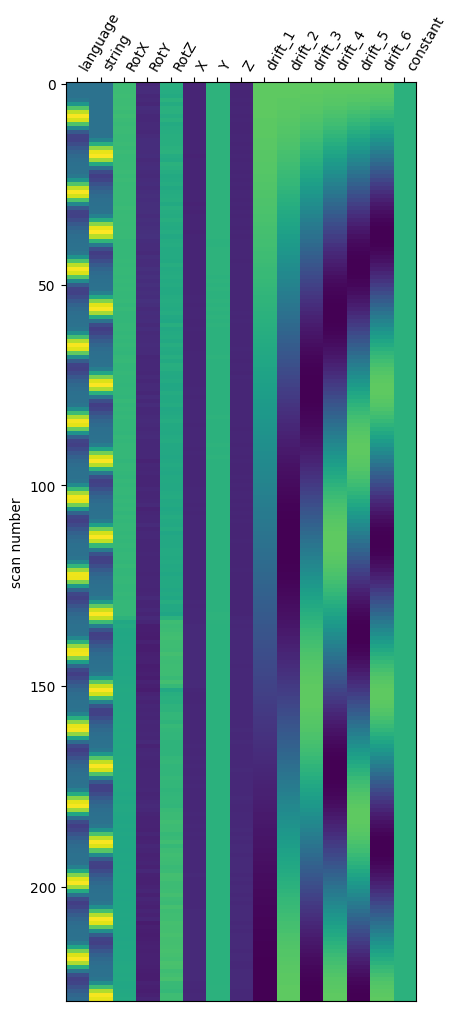

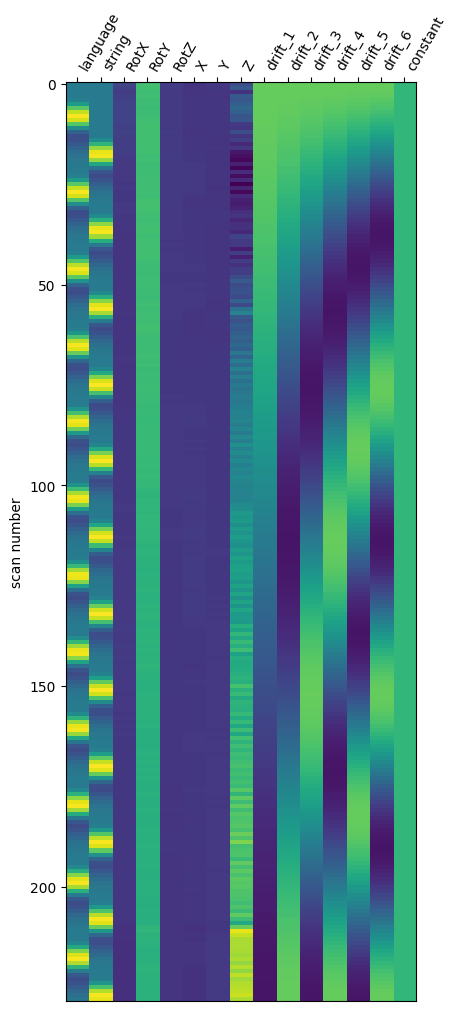

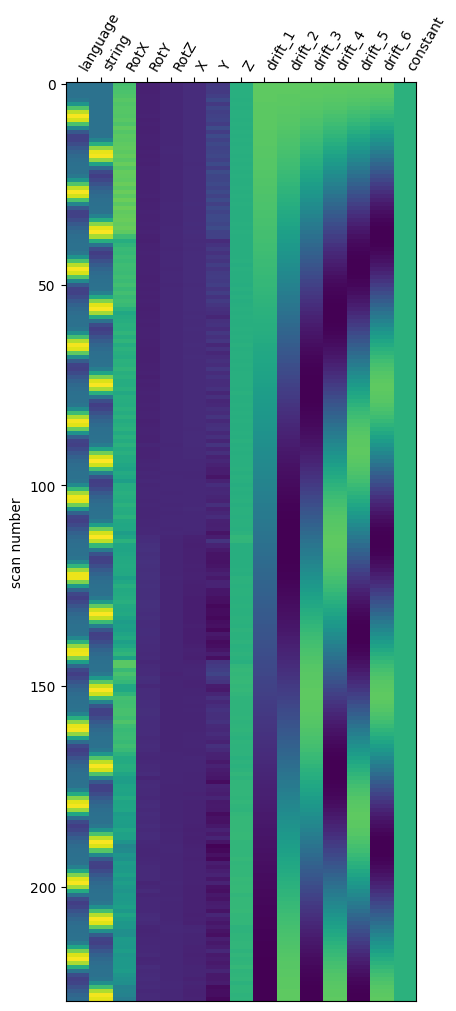

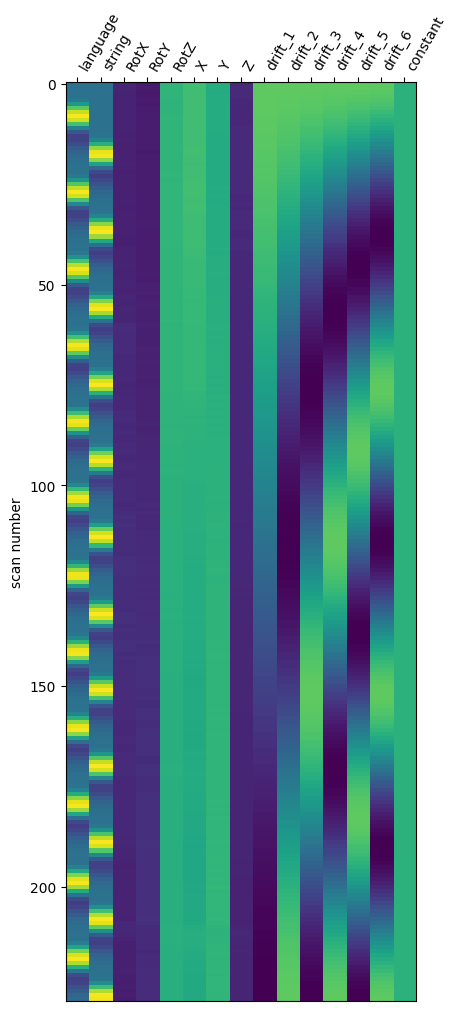

In [19]:
from nilearn import plotting

# Assuming you have already run first_level_from_bids
for i, model in enumerate(models):
    print(enumerate(models))
    # Fit the model before accessing design_matrices_
    model.fit(models_run_imgs[i], models_events[i], models_confounds[i])

    print(f"Subject {i+1}: Design Matrix")
    design_matrix = model.design_matrices_[0]  # Design matrix of first run
    plotting.plot_design_matrix(design_matrix)
    # Display the first few rows
    print(design_matrix.head())

In [20]:
from pathlib import Path

print([Path(run).name for run in models_run_imgs[0]])

['sub-01_task-languagelocalizer_desc-preproc_bold.nii.gz']


In [21]:
print(models_confounds[0][0].columns)

Index(['RotX', 'RotY', 'RotZ', 'X', 'Y', 'Z'], dtype='object')


In [22]:
print(models_events[0][0]["trial_type"].value_counts())

trial_type
language    12
string      12
Name: count, dtype: int64


Here, we specify the significance level for our single level analysis:

In [23]:
from scipy.stats import norm

p001_unc = norm.isf(0.001)

## Plotting the z-map
Finally, we plot the significant z-values for all of our subjects analysed in the first level analysis. We specify our contrast of interest in this step via the .compute_contrast function.

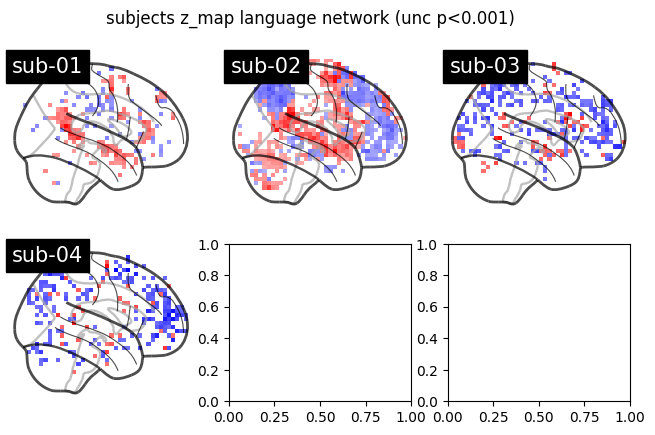

In [24]:
from math import ceil

import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting # import plotting here

ncols = 3
nrows = ceil(len(models) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4.5))
axes = np.atleast_2d(axes)
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
for midx, (model, imgs, events, confounds) in enumerate(model_and_args):
    # fit the GLM
    model.fit(imgs, events, confounds)
    # compute the contrast of interest
    zmap = model.compute_contrast("language-string")
    plotting.plot_glass_brain(
        zmap,
        colorbar=False,
        threshold=p001_unc,
        title=f"sub-{model.subject_label}",
        axes=axes[int(midx / ncols), int(midx % ncols)],
        plot_abs=False,
        display_mode="x",
        cmap="bwr",
    )
fig.suptitle("subjects z_map language network (unc p<0.001)")
plotting.show()

# Second (group) level analysis:

Second level models in Nilearn are used to perform group-level analyses on fMRI data. Once individual subjects have been processed in a common space (e.g. MNI, Talairach, or subject average), the data can be grouped and statistical tests performed to make broader inferences on fMRI activity. Some common second level models are one-sample (unpaired or paired) and two-sample t-tests.

In [25]:
from nilearn.glm.second_level import SecondLevelModel

second_level_input = models

In [26]:
second_level_model = SecondLevelModel(smoothing_fwhm=8.0, n_jobs=2)
second_level_model = second_level_model.fit(second_level_input)

In [27]:
zmap = second_level_model.compute_contrast(
    first_level_contrast="language-string"
)

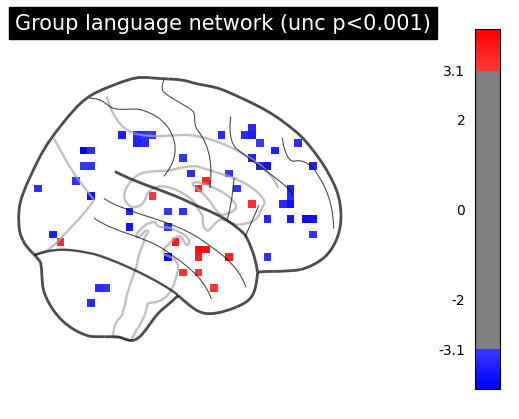

Exception ignored in: <function ResourceTracker.__del__ at 0x1066d9ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102d2dee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [ ]:
plotting.plot_glass_brain(
    zmap,
    colorbar=True,
    threshold=p001_unc,
    title="Group language network (unc p<0.001)",
    plot_abs=False,
    display_mode="x",
    figure=plt.figure(figsize=(5, 4)),
    cmap="bwr",
)
plotting.show()